In [1]:
import xml.etree.ElementTree as ET
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
#import tensorflow as tf

In [2]:
def sameTable(ymin_1, ymin_2, ymax_1, ymax_2):
    min_diff = abs(ymin_1 - ymin_2)
    max_diff = abs(ymax_1 - ymax_2)

    if min_diff <= 5 and max_diff <=5:
        return True
    elif min_diff <= 4 and max_diff <=7:
        return True
    elif min_diff <= 7 and max_diff <=4:
        return True
    return False



In [4]:
if __name__ == "__main__":
    directory = '/home/vimal/Documents/mask/3rd page/3/sample_3/'
    final_col_directory = '/home/vimal/Documents/mask/3rd page/3/column_mask/'
    final_table_directory = '/home/vimal/Documents/mask/3rd page/3/table_mask/'

    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        # Find all the xml files
        if filename.endswith(".xml"):
            filename = filename[:-4]

            # Parse xml file
            tree = ET.parse('/home/vimal/Documents/mask/3rd page/3/sample_3/' + filename + '.xml')
            root = tree.getroot()
            size = root.find('size')

            # Parse width
            width = int(size.find('width').text)
            height = int(size.find('height').text)

            # Create grayscale image array
            col_mask = np.zeros((height, width), dtype=np.int32)
            table_mask = np.zeros((height, width), dtype = np.int32)

            got_first_column = False
            i=0
            table_xmin = 10000
            table_xmax = 0

            table_ymin = 10000
            table_ymax = 0

            for column in root.findall('object'):
                bndbox = column.find('bndbox')
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)

                col_mask[ymin:ymax, xmin:xmax] = 255
                                
                if got_first_column:
                    if sameTable(prev_ymin, ymin, prev_ymax, ymax) == False:
                        i+=1
                        got_first_column = False
                        table_mask[table_ymin:table_ymax, table_xmin:table_xmax] = 255
                        
                        table_xmin = 10000
                        table_xmax = 0

                        table_ymin = 10000
                        table_ymax = 0
                        
                if got_first_column == False:
                    got_first_column = True
                    first_xmin = xmin
                    
                prev_ymin = ymin
                prev_ymax = ymax
                
                table_xmin = min(xmin, table_xmin)
                table_xmax = max(xmax, table_xmax)
                
                table_ymin = min(ymin, table_ymin)
                table_ymax = max(ymax, table_ymax)

            table_mask[table_ymin:table_ymax, table_xmin:table_xmax] = 255
            
            im = Image.fromarray(col_mask.astype(np.uint8),'L')
            im.save(final_col_directory + filename + ".jpeg")

            im = Image.fromarray(table_mask.astype(np.uint8),'L')
            im.save(final_table_directory + filename + ".jpeg")

Text(0.5, 1.0, 'column_mask')

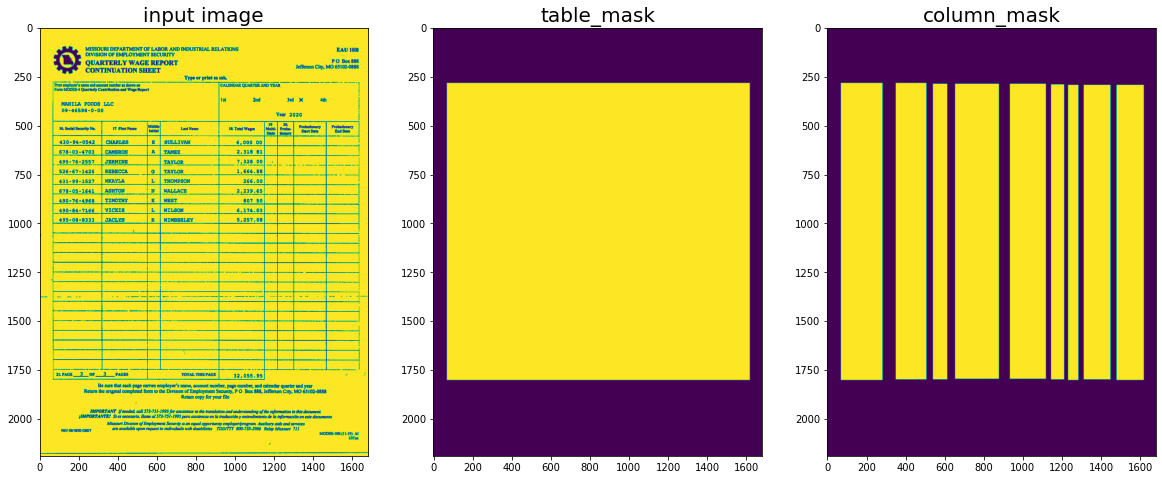

In [5]:
input = '/home/vimal/Documents/mask/3rd page/3/sample_3/0946598000.jpeg'
table_mask = '/home/vimal/Documents/mask/3rd page/3/table_mask/0946598000.jpeg'
column_mask = '/home/vimal/Documents/mask/3rd page/3/column_mask/0946598000.jpeg'


im = Image.open(input) 
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)


Text(0.5, 1.0, 'column_mask')

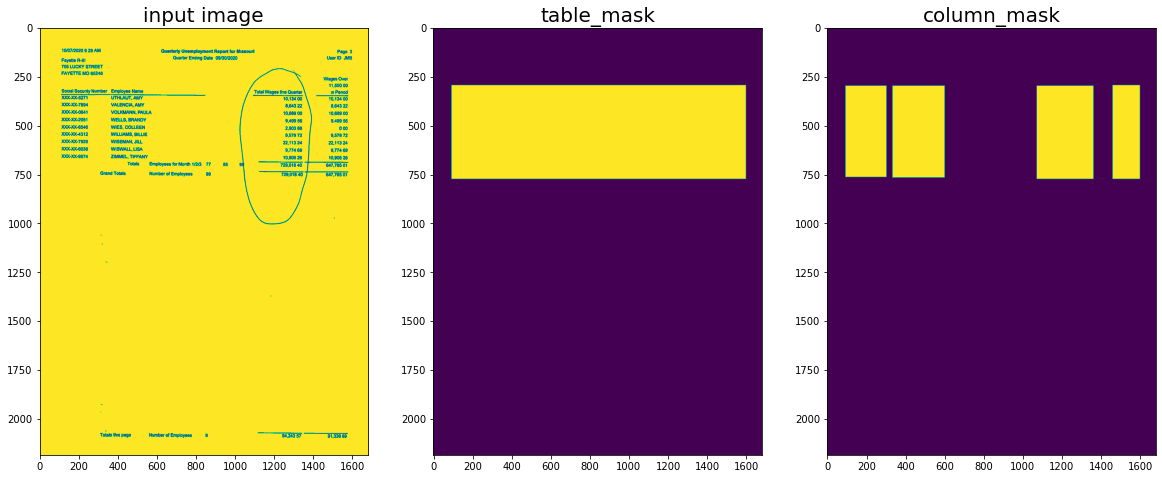

In [7]:
input = '/home/vimal/Documents/mask/4th page/final_input/0824112000.jpeg'
table_mask = '/home/vimal/Documents/mask/4th page/table_mask/0824112000.jpeg'
column_mask = '/home/vimal/Documents/mask/4th page/column_mask/0824112000.jpeg'


im = Image.open(input) 
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)
